In [1]:
! pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/4b/fb/2b6290436f0188d1f1d51c8076e32c9c50f24afa1c698430394eead3a890/yfinance-0.2.63-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
  Using cached peewee-3.18.1-cp311-cp311-macosx_11_0_arm64.whl
  Obtaining dependency information for curl_cffi>=0.7 from https://files.pythonhosted.org/packages/a1/0f/a49a9591e9e51e46db145dedeab85c4c4bd230b16d0ba3016b9d50e6f5e1/curl_cffi-0.11.3-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for protobuf>=3.19.0 from https://files.p

In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Define the ticker symbol for TCS on NSE
ticker = "TCS.NS"

# Set the date range: last 10 years from today (June 16, 2025)
end_date = datetime(2025, 6, 16)
start_date = end_date - relativedelta(years=10)

try:
    # Fetch data from Yahoo Finance
    tcs_data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    
    # Check if data is empty
    if tcs_data.empty:
        print("No data retrieved. Please check the ticker symbol or internet connection.")
    else:
        # Reset index to make 'Date' a column
        tcs_data.reset_index(inplace=True)
        
        # Preview the first few rows
        print("\nFirst 5 rows of TCS data:")
        print(tcs_data.head())
        
        # Save data to a CSV file
        output_file = "TCS_10years_data.csv"
        tcs_data.to_csv(output_file, index=False)
        print(f"\nData saved to {output_file}")
        
        # Basic data summary
        print("\nData Summary:")
        print(f"Total rows: {len(tcs_data)}")
        print(f"Columns: {list(tcs_data.columns)}")
        print(f"Date range: {tcs_data['Date'].min()} to {tcs_data['Date'].max()}")

except Exception as e:
    print(f"An error occurred: {str(e)}")

/var/folders/pv/fjmjclcx3212r9twdzmlsg8w0000gn/T/ipykernel_27845/1292550011.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tcs_data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed


First 5 rows of TCS data:
Price        Date        Close         High          Low         Open   Volume
Ticker                  TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
0      2015-06-16  1042.051758  1045.080034  1034.771479  1037.073804  1267396
1      2015-06-17  1042.797974  1049.165543  1037.820022  1045.784725  1975720
2      2015-06-18  1049.538940  1056.279917  1040.391934  1043.295739  2165046
3      2015-06-19  1057.628540  1059.889340  1048.315638  1051.592751  1999610
4      2015-06-22  1075.030518  1078.556568  1056.570607  1056.570607  1102002

Data saved to TCS_10years_data.csv

Data Summary:
Total rows: 2468
Columns: [('Date', ''), ('Close', 'TCS.NS'), ('High', 'TCS.NS'), ('Low', 'TCS.NS'), ('Open', 'TCS.NS'), ('Volume', 'TCS.NS')]
Date range: 2015-06-16 00:00:00 to 2025-06-13 00:00:00


In [4]:
! pip install pandas ta scikit-learn

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=9598b1123bafb60549b4e1afdca8539fcc47c9bcabd7b775e2ec663fbd20b893
  Stored in directory: /Users/devishadhanuka/Library/Caches/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [10]:
import yfinance as yf
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
from ta.trend import SMAIndicator, EMAIndicator, MACD, PSARIndicator, CCIIndicator
from ta.momentum import RSIIndicator, StochasticOscillator, WilliamsRIndicator, ROCIndicator
from ta.volatility import BollingerBands, AverageTrueRange, KeltnerChannel
from ta.volume import OnBalanceVolumeIndicator, AccDistIndexIndicator, ChaikinMoneyFlowIndicator, VolumeWeightedAveragePrice
from sklearn.preprocessing import MinMaxScaler

# Define ticker and date range
ticker = "TCS.NS"
end_date = datetime(2025, 6, 16)
start_date = end_date - relativedelta(years=10)

# Fetch TCS data
print("Downloading data...")
df = yf.download(ticker, start=start_date, end=end_date, interval="1d", auto_adjust=True)
print(f"Data downloaded. Shape: {df.shape}")

# Check if data is valid
if df is None or df.empty:
    print("No data retrieved. Check ticker or connection.")
else:
    print("Processing data...")

    # Reset index to make 'Date' a column
    df.reset_index(inplace=True)

    # Flatten MultiIndex columns if they exist
    df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

    # Ensure Date column is datetime type
    df['Date'] = pd.to_datetime(df['Date'])

    # Set index temporarily for VWAP
    df.set_index('Date', inplace=True)

    # Calculate technical indicators
    print("Calculating indicators...")

    # Trend indicators
    df['SMA_20'] = SMAIndicator(close=df['Close'], window=20).sma_indicator()
    df['EMA_20'] = EMAIndicator(close=df['Close'], window=20).ema_indicator()
    macd = MACD(close=df['Close'], window_slow=26, window_fast=12, window_sign=9)
    df['MACD'] = macd.macd()
    df['MACD_Signal'] = macd.macd_signal()
    df['PSAR'] = PSARIndicator(high=df['High'], low=df['Low'], close=df['Close']).psar()
    df['CCI_20'] = CCIIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=20).cci()

    # Momentum indicators
    df['RSI_14'] = RSIIndicator(close=df['Close'], window=14).rsi()
    stoch = StochasticOscillator(high=df['High'], low=df['Low'], close=df['Close'], window=14, smooth_window=3)
    df['Stoch_K'] = stoch.stoch()
    df['Stoch_D'] = stoch.stoch_signal()
    df['WilliamsR_14'] = WilliamsRIndicator(high=df['High'], low=df['Low'], close=df['Close'], lbp=14).williams_r()
    df['ROC_12'] = ROCIndicator(close=df['Close'], window=12).roc()

    # Volatility indicators
    bb = BollingerBands(close=df['Close'], window=20, window_dev=2)
    df['BB_Upper'] = bb.bollinger_hband()
    df['BB_Middle'] = bb.bollinger_mavg()
    df['BB_Lower'] = bb.bollinger_lband()
    df['ATR_14'] = AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=14).average_true_range()
    kc = KeltnerChannel(high=df['High'], low=df['Low'], close=df['Close'], window=20)
    df['KC_Upper'] = kc.keltner_channel_hband()
    df['KC_Lower'] = kc.keltner_channel_lband()

    # Volume indicators
    df['OBV'] = OnBalanceVolumeIndicator(close=df['Close'], volume=df['Volume']).on_balance_volume()
    df['AD_Line'] = AccDistIndexIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume']).acc_dist_index()
    df['CMF_20'] = ChaikinMoneyFlowIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=20).chaikin_money_flow()
    df['VWAP'] = VolumeWeightedAveragePrice(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume']).volume_weighted_average_price()

    # Reset index back
    df.reset_index(inplace=True)

    # Drop initial rows with NaNs due to rolling indicators
    df.dropna(inplace=True)

    # Normalize all numeric columns (excluding 'Date')
    print("Normalizing data...")
    scaler = MinMaxScaler()
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # Preview
    print("\nFirst 5 rows of normalized TCS data with indicators:")
    print(df.head())

    # Save to CSV
    output_file = "TCS_10years_normalized_indicators.csv"
    df.to_csv(output_file, index=False)
    print(f"\n✅ Data saved to {output_file}")

    # Summary
    print("\n📊 Data Summary:")
    print(f"Total rows: {len(df)}")
    print(f"Columns: {list(df.columns)}")
    print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")


[*********************100%***********************]  1 of 1 completed

Data downloaded. Shape: (2468, 5)
Processing data...
Calculating indicators...
Normalizing data...

First 5 rows of normalized TCS data with indicators:
         Date     Close      High       Low      Open    Volume    SMA_20  \
33 2015-07-31  0.043063  0.039145  0.046434  0.038565  0.022299  0.035953   
34 2015-08-03  0.042928  0.039845  0.048075  0.040143  0.013391  0.035243   
35 2015-08-04  0.042846  0.039612  0.046316  0.040962  0.026601  0.034630   
36 2015-08-05  0.047337  0.042764  0.049268  0.042084  0.011230  0.034375   
37 2015-08-06  0.050407  0.046615  0.053884  0.047345  0.025110  0.034714   

      EMA_20      MACD  MACD_Signal  ...  BB_Upper  BB_Middle  BB_Lower  \
33  0.032105  0.511863     0.503213  ...  0.030857   0.035953  0.045197   
34  0.031954  0.512679     0.501748  ...  0.028768   0.035243  0.045944   
35  0.031809  0.513432     0.500748  ...  0.026877   0.034630  0.046681   
36  0.032121  0.518909     0.501195  ...  0.025804   0.034375  0.047283   
37  0.032


Pearson Correlation Coefficients:
                 Price   Returns  Lagged_Returns
SMA_20        0.996609 -0.051289       -0.051638
EMA_20        0.997559 -0.051086       -0.051916
RSI_14        0.022129  0.125571       -0.054558
MACD          0.085293 -0.011151       -0.033530
MACD_Signal   0.088615 -0.027297       -0.031141
Stoch_K       0.033666  0.175885       -0.021733
Stoch_D       0.036466  0.038096       -0.041457
BB_Upper      0.995730 -0.050630       -0.050933
BB_Middle     0.996609 -0.051289       -0.051638
BB_Lower      0.995156 -0.051883       -0.052282
ATR_14        0.852359 -0.039310       -0.040741
OBV           0.954106 -0.040984       -0.050910
CCI_20        0.012000  0.117441       -0.032192
WilliamsR_14  0.033666  0.175885       -0.021733
ROC_12        0.013587  0.090492       -0.038371
AD_Line      -0.876411  0.044393        0.030587
CMF_20       -0.057986  0.055238       -0.019254
PSAR          0.993286 -0.055043       -0.051790
VWAP          0.997821 -0.051633  

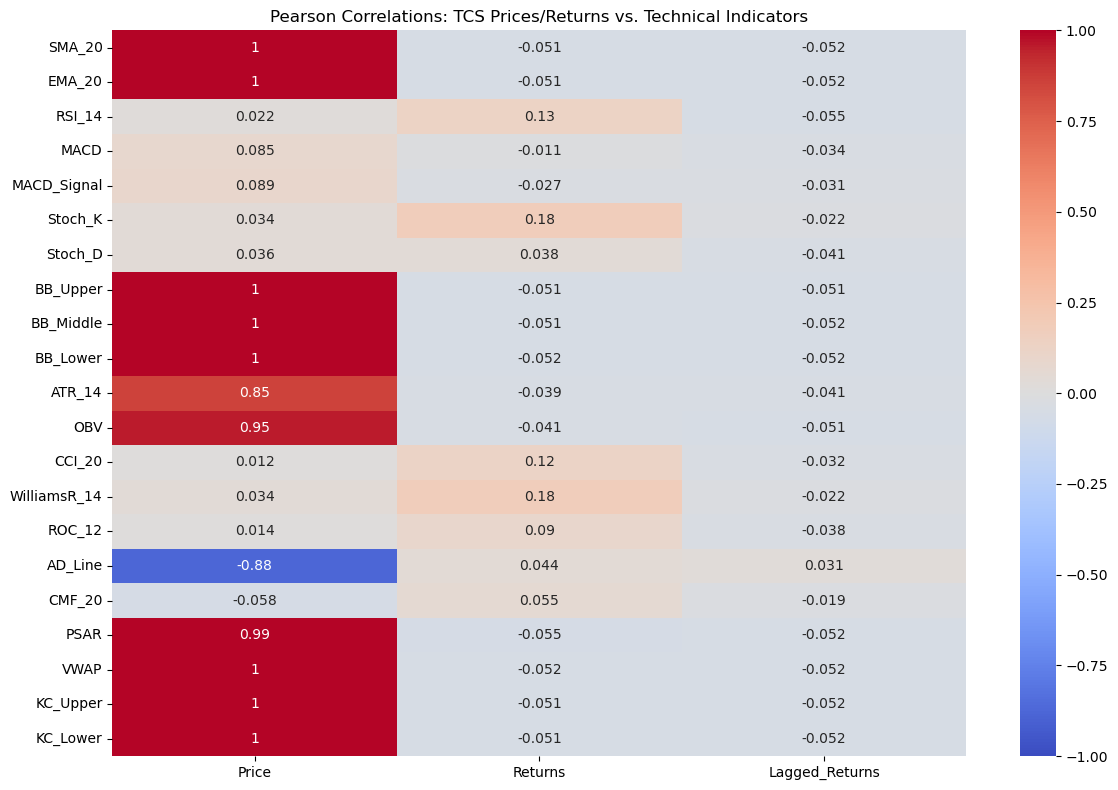

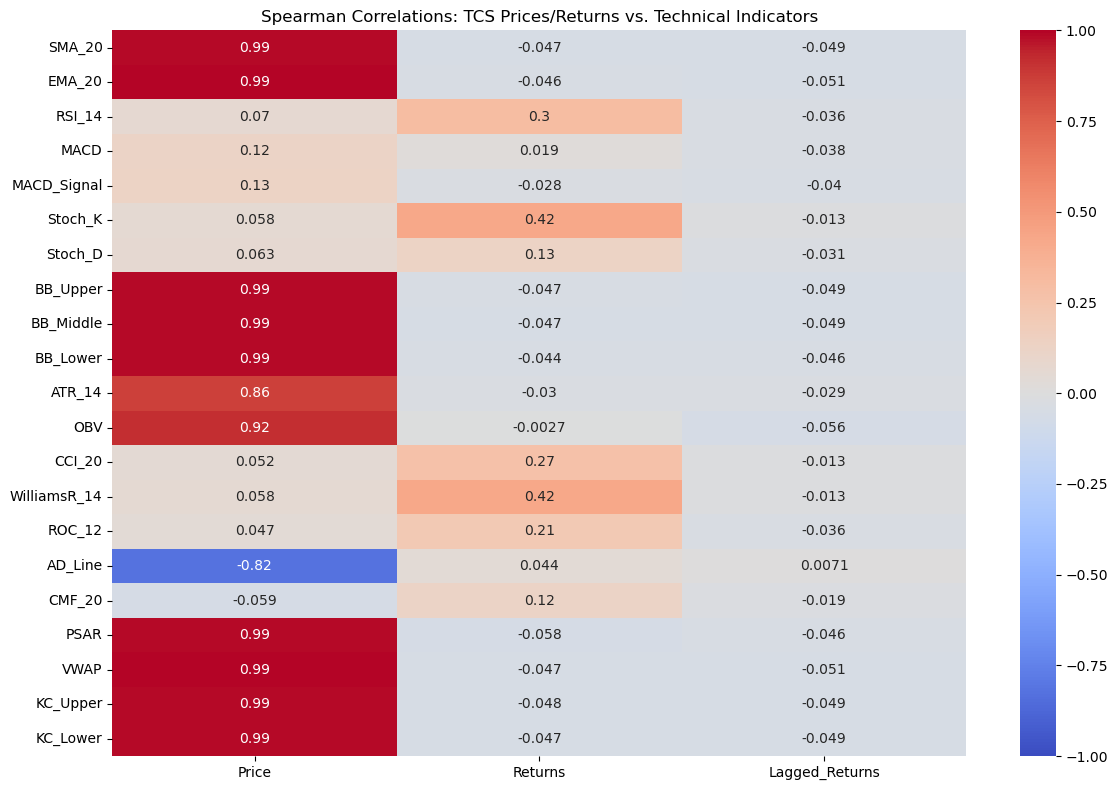


Significant Pearson Correlations (|corr| > 0.3) for Returns or Lagged Returns:
Empty DataFrame
Columns: [Price, Returns, Lagged_Returns]
Index: []

Significant Spearman Correlations (|corr| > 0.3) for Returns or Lagged Returns:
                 Price   Returns  Lagged_Returns
Stoch_K       0.057949  0.424334       -0.013076
WilliamsR_14  0.057949  0.424334       -0.013076


In [13]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# Load the normalized TCS dataset
try:
    df = pd.read_csv("TCS_10years_normalized_indicators.csv")
except FileNotFoundError:
    print("Error: TCS_10years_normalized_indicators.csv not found. Please run the previous code to generate it.")
    exit()

# Calculate daily returns based on normalized Adj Close
df['Returns'] = df['Close'].pct_change()

# Drop rows with NaN values (due to returns or indicator lookback periods)
df = df.dropna()

# Define columns for correlation analysis
price_col = 'Close'  # For price-based correlations
returns_col = 'Returns'  # For return-based correlations
indicator_cols = ['SMA_20', 'EMA_20', 'RSI_14', 'MACD', 'MACD_Signal', 'Stoch_K', 'Stoch_D',
                 'BB_Upper', 'BB_Middle', 'BB_Lower', 'ATR_14', 'OBV', 'CCI_20', 'WilliamsR_14',
                 'ROC_12', 'AD_Line', 'CMF_20', 'PSAR', 'VWAP', 'KC_Upper', 'KC_Lower']

# Initialize dictionaries to store correlations
pearson_results = {'Price': {}, 'Returns': {}, 'Lagged_Returns': {}}
spearman_results = {'Price': {}, 'Returns': {}, 'Lagged_Returns': {}}

# Function to calculate correlations
def calculate_correlations(data, x_col, y_col, lag=0):
    if lag > 0:
        x = data[x_col].shift(lag)
    else:
        x = data[x_col]
    y = data[y_col]

    # Drop NaNs and Infs
    valid_data = pd.concat([x, y], axis=1).replace([np.inf, -np.inf], np.nan).dropna()
    
    if len(valid_data) < 3:  # Ensure enough samples
        return np.nan, np.nan

    try:
        # Pearson correlation
        pearson_corr, _ = pearsonr(valid_data.iloc[:, 0], valid_data.iloc[:, 1])
        # Spearman correlation
        spearman_corr, _ = spearmanr(valid_data.iloc[:, 0], valid_data.iloc[:, 1])
        return pearson_corr, spearman_corr
    except:
        return np.nan, np.nan


# Calculate correlations for each indicator
for col in indicator_cols:
    # 1. Price vs. Indicator (non-lagged)
    pearson_corr, spearman_corr = calculate_correlations(df, col, price_col)
    pearson_results['Price'][col] = pearson_corr
    spearman_results['Price'][col] = spearman_corr
    
    # 2. Returns vs. Indicator (non-lagged)
    pearson_corr, spearman_corr = calculate_correlations(df, col, returns_col)
    pearson_results['Returns'][col] = pearson_corr
    spearman_results['Returns'][col] = spearman_corr
    
    # 3. Returns vs. Lagged Indicator (t-1)
    pearson_corr, spearman_corr = calculate_correlations(df, col, returns_col, lag=1)
    pearson_results['Lagged_Returns'][col] = pearson_corr
    spearman_results['Lagged_Returns'][col] = spearman_corr

# Convert results to DataFrames
pearson_df = pd.DataFrame(pearson_results)
spearman_df = pd.DataFrame(spearman_results)

# Print correlation results
print("\nPearson Correlation Coefficients:")
print(pearson_df)
print("\nSpearman Correlation Coefficients:")
print(spearman_df)

# Save correlation results to CSV
pearson_df.to_csv("TCS_pearson_correlations.csv")
spearman_df.to_csv("TCS_spearman_correlations.csv")
print("\nCorrelation results saved to TCS_pearson_correlations.csv and TCS_spearman_correlations.csv")

# Visualize correlations with heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Pearson Correlations: TCS Prices/Returns vs. Technical Indicators")
plt.tight_layout()
plt.savefig("TCS_pearson_heatmap.png")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Spearman Correlations: TCS Prices/Returns vs. Technical Indicators")
plt.tight_layout()
plt.savefig("TCS_spearman_heatmap.png")
plt.show()

# Highlight significant correlations (absolute value > 0.3 for Returns or Lagged_Returns)
print("\nSignificant Pearson Correlations (|corr| > 0.3) for Returns or Lagged Returns:")
significant_pearson = pearson_df[(pearson_df['Returns'].abs() > 0.3) | (pearson_df['Lagged_Returns'].abs() > 0.3)]
print(significant_pearson)

print("\nSignificant Spearman Correlations (|corr| > 0.3) for Returns or Lagged Returns:")
significant_spearman = spearman_df[(spearman_df['Returns'].abs() > 0.3) | (spearman_df['Lagged_Returns'].abs() > 0.3)]
print(significant_spearman)